<a href="https://colab.research.google.com/github/theamitmehra/Oasis-Infobyte-projects/blob/main/Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction Using Python
This project predicts product sales based on advertising expenditure across TV, Radio, and Newspaper channels. The dataset contains 200 rows of data with the following columns:
- **TV**: Advertising budget for TV in thousands of dollars.
- **Radio**: Advertising budget for Radio in thousands of dollars.
- **Newspaper**: Advertising budget for Newspaper in thousands of dollars.
- **Sales**: Product sales in thousands of units.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

## Loading the dataset

In [ ]:
df = pd.read_csv("Advertising.csv")

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Plotting Correlation matrix

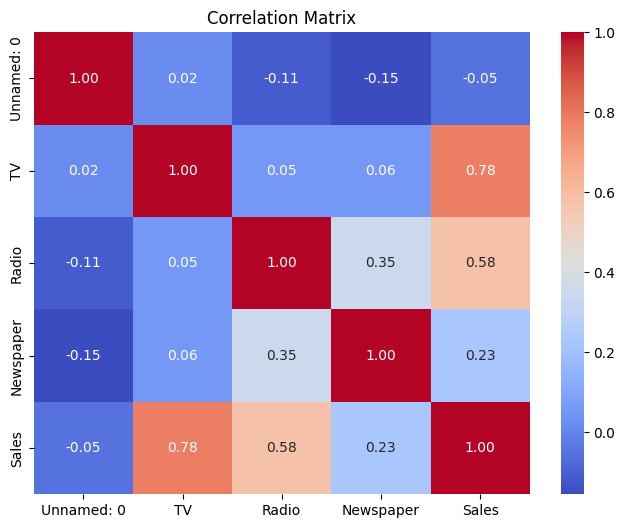

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Data distribution

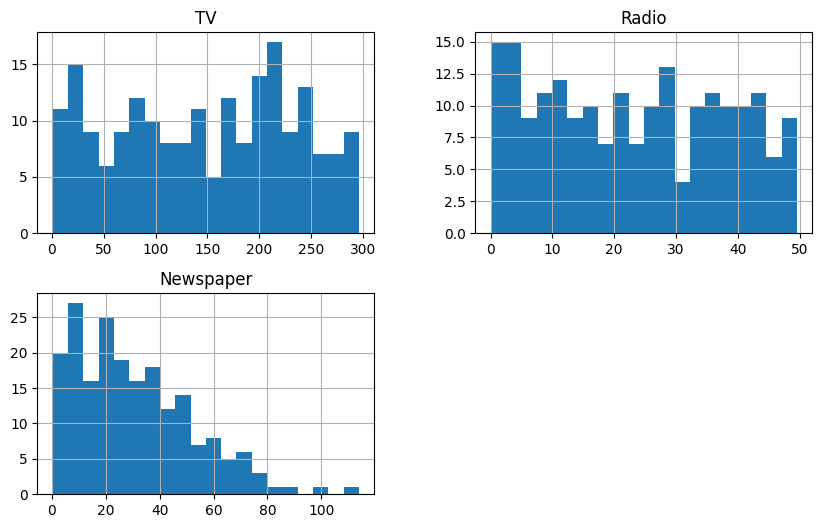

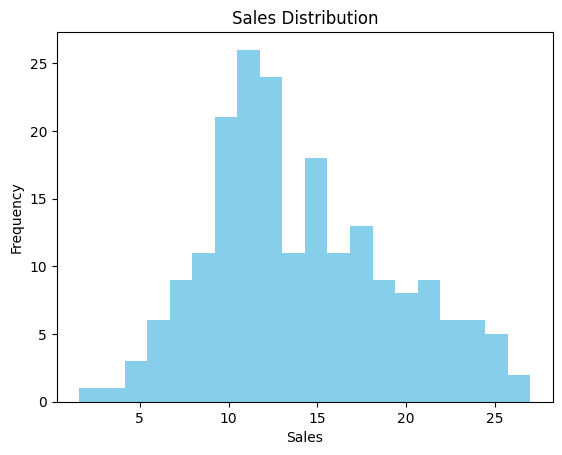

In [ ]:
df[['TV', 'Radio', 'Newspaper']].hist(bins=20, figsize=(10, 6))
plt.show()


plt.hist(df['Sales'], bins=20, color='skyblue')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

## removing the unnecesary columns

In [ ]:
df = df.drop(columns=["Unnamed: 0"])

In [ ]:
X = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

## Spliting the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (160, 3)
Testing data shape: (40, 3)


## Linear Regression model

In [ ]:
linear_model = LinearRegression()

## Model training

In [ ]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122631


## Model prediction

In [ ]:
y_pred = linear_model.predict(X_test)

## Calculating Performance metrics

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score (R2): {r2}")

Model Performance:
Mean Squared Error (MSE): 3.174097353976104
Mean Absolute Error (MAE): 1.4607567168117601
R-squared Score (R2): 0.899438024100912


## Bar plot for coefficients

In [ ]:
features = ['TV', 'Radio', 'Newspaper']
coefficients = linear_model.coef_

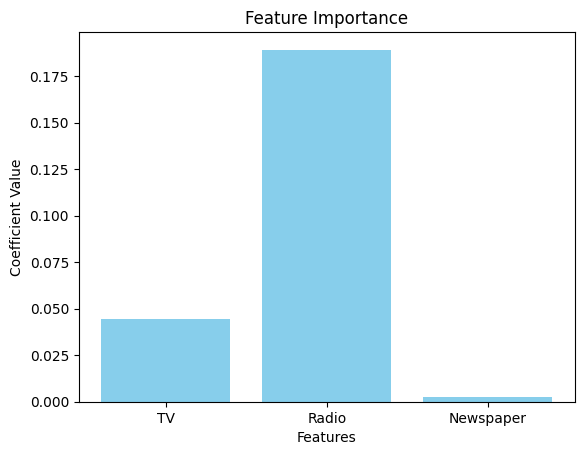

In [ ]:
plt.bar(features, coefficients, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

## Scatter plot: Actual vs Predicted Sales

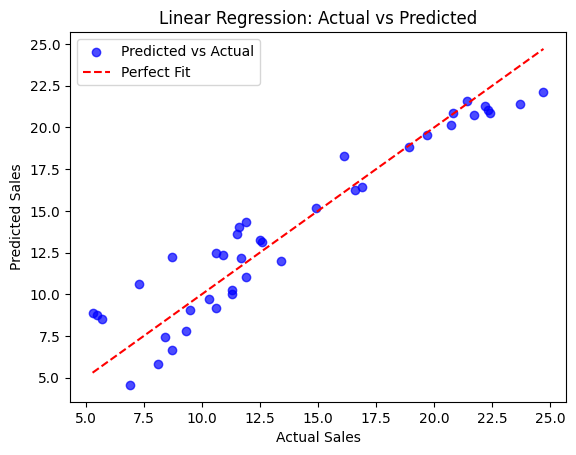

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

## Using cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE Scores:", cv_scores)
print("Average CV MSE:", -cv_scores.mean())

Cross-Validation MSE Scores: [-3.1365399  -2.42566776 -1.58522508 -5.42615506 -2.79114519]
Average CV MSE: 3.072946597100212


## Plotting residuals

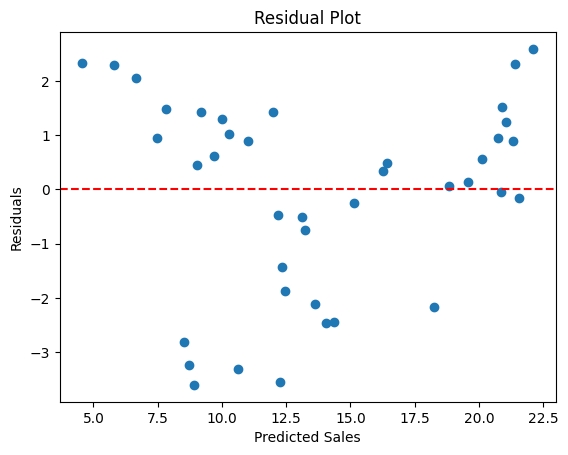

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## Deployment

In [ ]:
import joblib
joblib.dump(linear_model, "linear_regression_model.pkl")
print("model saved as linear_regression_model.pkl")

model saved as linear_regression_model.pkl


## Loading and reusing the model

In [ ]:
loaded_model = joblib.load("linear_regression_model.pkl")

predictions = loaded_model.predict(X_test)

In [ ]:
predictions

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])